# Ising VQE

In [2]:
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import RX, RY, RZ
from pyquil.paulis import PauliSum, PauliTerm, sX, sY, sZ
from grove.pyvqe.vqe import VQE
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def ansatz(params):
    ops = (RY(params[i], i) for i in range(len(params)))
    return Program(ops)

In [52]:
def hamiltonian(h, j):
    h = np.asscalar(h)
    h = 0
    for key in j.keys():
        h += -1 * (j[key] * sz(key[0]) * sz(key[1]))
    for idx in range(num_spins):
        h += -1 * h * sx(idx)
    return h

In [10]:
qvm = api.QVMConnection()

In [11]:
num_spins = 5
ansatz_params = np.zeros(num_spins)
J = {}
idxs = [(i, i+1) if i < num_spins else (i, 0) for i in range(num_spins + 1)]
for pair in idxs:
    J[pair] = 1

In [34]:
ext_field_arr = np.arange(0, 3., 0.2)
hamiltonian_arr = [hamiltonian(val, J) for val in ext_field_arr]

In [36]:
vqe_inst = VQE(minimizer=minimize, minimizer_kwargs={'method': 'nelder-mead'})

In [37]:
#expectation_arr = [vqe_inst.expectation(ansatz(ansatz_params), val, None, qvm) 
#                   for val in hamiltonian_arr]
#expectation_arr

In [40]:
results_arr = [vqe_inst.vqe_run(ansatz, val, ansatz_params, None, qvm=qvm)
               for val in hamiltonian_arr]

                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective
                     models will be ineffective


In [45]:
exp_val_hamiltonian = [i['fun'] / (num_spins+1) for i in results_arr]

 Plot $\langle \psi \, | \, H \, | \, \psi \rangle$ vs. $h$ 

And compare to FIG. 52. in [Quantum Algorithm Implementations for Beginners](https://arxiv.org/pdf/1804.03719.pdf)

<IPython.core.display.Javascript object>


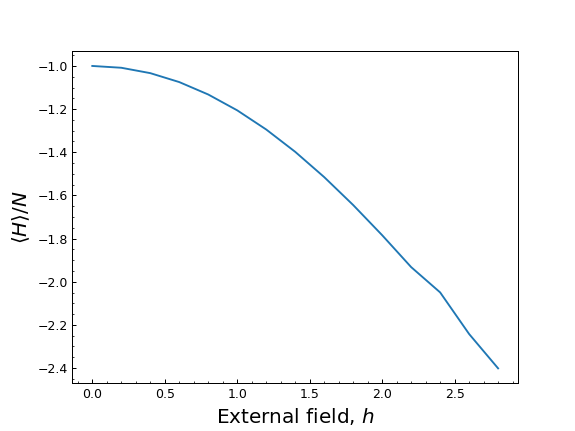

Text(0.5,0,'External field, $h$')

Text(0,0.5,'$\\langle H \\rangle / N$')

In [50]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.plot(ext_field_arr, exp_val_hamiltonian)
ax.set_xlabel(r"External field, $h$", fontsize=16)
ax.set_ylabel(r"$\langle H \rangle / N$", fontsize=16)
plt.show()